# <center><font color='red'>CYTOSKELETON</font></center>
### <center><font color='orange'>AUTHOR: Diogo Vieira</font></center>

-------------------------------------------

### <center><font color='grey'>Imports</font></center>

#### <center><font color='grey'>Libraries</font></center>

In [1]:
# Math, image processing and other useful libraries
from __future__ import print_function, unicode_literals, absolute_import, division
import os

import pandas as pd
import numpy as np
import cv2
from collections import OrderedDict
import copy
import math
import pickle
from matplotlib.ticker import MaxNLocator
from itertools import combinations

# Image processing
from skimage.measure import regionprops
from skimage.filters import meijering, sato, frangi, hessian, threshold_otsu
from skimage.morphology import extrema, skeletonize
from skimage.transform import probabilistic_hough_line
from skimage.draw import disk, circle_perimeter
from scipy.ndimage import gaussian_filter, grey_closing
from scipy.spatial import distance_matrix
from skimage import data, restoration, util
from roipoly import RoiPoly
from matplotlib_scalebar.scalebar import ScaleBar
from biosppy.signals import tools
from biosppy.stats import pearson_correlation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as pltc
import matplotlib.colors as colors
import seaborn as sns

# Widgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

# Feature Extraction (.py files by Teresa Parreira)
# from CytoSkeletonPropsMorph import CytoSkeletonPropsMorph
# from CytoSkeletonRegionPropsInt import RegionPropsInt
# from FreqAnalysis import FreqAnalysis
# from GLCM import GLCM

# Graph
import sknw
import networkx as nx
from scipy.signal import argrelextrema

# 
from skan import Skeleton, summarize,draw
from skan.csr import skeleton_to_csgraph, sholl_analysis,make_degree_image
import scipy as sp
import scipy.sparse
from matplotlib.patches import Circle
from framework.ImageFeatures import ImageFeatures,getvoxelsize
from framework.Functions import cv2toski,pylsdtoski,polar_to_cartesian, remove_not1D, quantitative_analysis,hist_bin,hist_lim,branch,graphAnalysis
from framework.Importing import label_image,init_import,label_SPOCC
from framework.PreProcessingCYTO import cytoskeleton_preprocessing, df_cytoskeleton_preprocessing
from framework.PreProcessingNUCL import excludeborder, nuclei_preprocessing, df_nuclei_preprocessing, nuclei_segmentation
from framework.Processing import process3Dnuclei,analyze_cell,df_analyze_cell,create_separate_DFs
from framework.visualization import truncate_colormap, plot_hist, plot_pie
#from fractal_dimension import fractal_dimension
#from fractal_analysis_fxns import boxcount,boxcount_grayscale,fractal_dimension,fractal_dimension_grayscale,fractal_dimension_grayscale_DBC

print('📚 All libraries successfully imported 📚')

📚 All libraries successfully imported 📚


#### <center><font color='grey'>Directories</font></center>

In [2]:
### DATASET #1 (2D)
folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\SPOCC2022"
options   = ["CYTO_DECONV"]

### DATASET #2 (3D)
#folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 3D"
#options   = ["3D"]

### DATASET #3 (Soraia)
# folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Soraia"
# options   = ["3D"]

### DATASET #4 (Inês)
# folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Ines"
#options     = []


data = init_import(folder,options,label_SPOCC)
#data['NUCL_PRE'] = pd.read_pickle(folder + "\\NUCL_PRE\\NUCL_PRE.pkl") # pd.read_pickle(os.getcwd() + "\\NUCL_PRE_2D_StarDist.pkl") #
#data['CYTO_PRE'] = pd.read_pickle(folder + "\\CYTO_PRE\\CYTO_PRE.pkl") 

>>> [CYTO_DECONV] added.


In [3]:
data['CYTO_DECONV']

,Path,Name,Label,Image
0hrs_1(1).tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,Cell_0hrs_1(1).tif,0hrs,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
0hrs_1.tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,Cell_0hrs_1.tif,0hrs,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
0hrs_10(1).tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,Cell_0hrs_10(1).tif,0hrs,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
0hrs_10.tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,Cell_0hrs_10.tif,0hrs,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
0hrs_11.tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,Cell_0hrs_11.tif,0hrs,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...
8hrs_7.tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,Cell_8hrs_7.tif,8hrs,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8hrs_8(1).tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,Cell_8hrs_8(1).tif,8hrs,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8hrs_8.tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,Cell_8hrs_8.tif,8hrs,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8hrs_9(1).tif,C:\Users\diogo\OneDrive - Universidade de Lisb...,Cell_8hrs_9(1).tif,8hrs,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


---------------------------------------------

### <center><font color='grey'>__ Preprocessing __</font></center>

#### <center><font color='grey'>Cytoskeleton</font></center>

In [36]:
data['CYTO_PRE'] = df_cytoskeleton_preprocessing(data['CYTO_DECONV'])

>>> Image 11 done.
>>> Image 16 done.
>>> Image 18 done.
>>> Image 20 done.
>>> Image 30 done.
>>> Image 34 done.
>>> Image 36 done.
>>> Image 38 done.
>>> Image 40 done.
>>> Image 42 done.
>>> Image 44 done.
>>> Image 59 done.
>>> Image 63 done.
>>> Image 66 done.
>>> Image 70 done.
>>> Image 72 done.
>>> Image 74 done.
>>> Image 9 done.


In [37]:
data['CYTO_PRE'].to_pickle(".//CYTO_PRE.pkl") 

-------------------------

### <center><font color='grey'>__ Segmentation __ </font></center>

In [4]:
# OPTION 1: Import ROIs
ROIs    = pickle.load(open(folder + '\\ROIs\\'+ 'ROIs.p', 'rb'))  

# OPTION 2: Create new dataset
#ROIs    = pd.DataFrame(columns = ['Name','Index','Label','ROImask'])
    
print('>>> ROIs imported. ✔️')

>>> ROIs imported. ✔️


-----------------

### <center><font color='grey'>__ Processing __ </font></center>

PROCESSING FUNCTIONS:
 - nuclei_processing: read segmentation masks from dir, perform DNF analysis
 - analyze_cell: cytoskeleton + nucleus

In [3]:
nucDF = process3Dnuclei(os.getcwd() + '\\Datasets\\maisexps_clean')

C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\Projeto\Biological Quantification\Cytoskeleton\Datasets\maisexps_clean/11_6IF_CHO_L_w3z_decon_ch00.tif
1.639344262295082
3.278688524590164
4.918032786885246
6.557377049180328
8.19672131147541
9.836065573770492
11.475409836065573
13.114754098360656
14.754098360655737
16.39344262295082
18.0327868852459
19.672131147540984
21.311475409836067
22.950819672131146
24.59016393442623
26.229508196721312
27.868852459016395
29.508196721311474
31.147540983606557
32.78688524590164
34.42622950819672
36.0655737704918
37.704918032786885
39.34426229508197
40.98360655737705
42.622950819672134
44.26229508196721
45.90163934426229
47.540983606557376
49.18032786885246
50.81967213114754
52.459016393442624
54.09836065573771
55.73770491803279
57.377049180327866
59.01639344262295
60.65573770491803
62.295081967213115
63.9344262295082
65.57377049180327
67.21311475409836
68.85245901639344
70.49180327868852
72.1311475409836
73.77049180327869
75.409

0.7299270072992701
1.4598540145985401
Volume convex exceeded 200%
2.18978102189781
2.9197080291970803
3.6496350364963503
4.37956204379562
5.109489051094891
5.839416058394161
6.569343065693431
7.299270072992701
8.02919708029197
8.75912408759124
9.489051094890511
10.218978102189782
10.94890510948905
11.678832116788321
12.408759124087592
13.138686131386862
13.86861313868613
14.598540145985401
15.328467153284672
16.05839416058394
16.78832116788321
17.51824817518248
18.248175182481752
18.978102189781023
19.708029197080293
20.437956204379564
21.16788321167883
21.8978102189781
22.62773722627737
23.357664233576642
24.087591240875913
24.817518248175183
25.547445255474454
26.277372262773724
27.00729927007299
27.73722627737226
28.467153284671532
29.197080291970803
29.927007299270073
30.656934306569344
31.386861313868614
32.11678832116788
32.846715328467155
33.57664233576642
34.306569343065696
35.03649635036496
35.76642335766423
Volume convex exceeded 200%
36.496350364963504
37.22627737226277
37.9

11.267605633802816
12.67605633802817
14.084507042253522
15.492957746478874
16.901408450704224
18.309859154929576
19.718309859154928
21.12676056338028
22.535211267605632
23.943661971830984
25.35211267605634
26.760563380281692
28.169014084507044
29.577464788732396
30.985915492957748
32.394366197183096
33.80281690140845
35.2112676056338
36.61971830985915
38.028169014084504
39.436619718309856
40.84507042253521
42.25352112676056
43.66197183098591
45.070422535211264
46.478873239436616
47.88732394366197
49.29577464788732
50.70422535211268
52.11267605633803
53.521126760563384
54.929577464788736
56.33802816901409
57.74647887323944
59.15492957746479
60.563380281690144
61.971830985915496
63.38028169014085
64.78873239436619
66.19718309859155
67.6056338028169
69.01408450704226
70.4225352112676
71.83098591549296
73.2394366197183
74.64788732394366
76.05633802816901
77.46478873239437
78.87323943661971
80.28169014084507
81.69014084507042
83.09859154929578
84.50704225352112
85.91549295774648
87.32394366

In [5]:
nucDF.to_pickle(".//nucDF_9mar_lastversion.pkl") 

8815


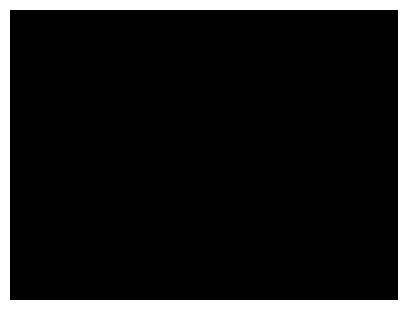

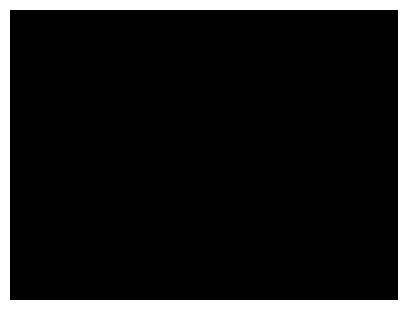

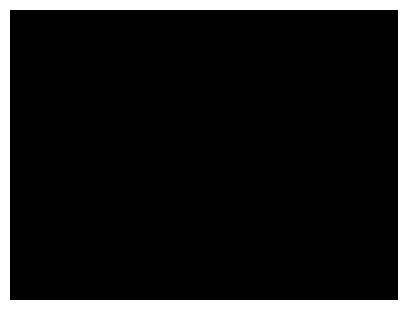

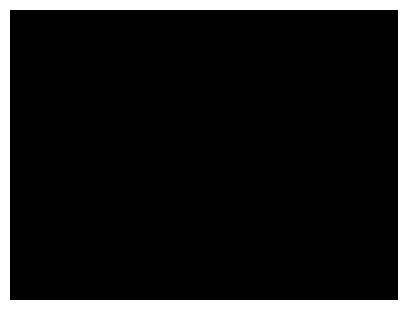

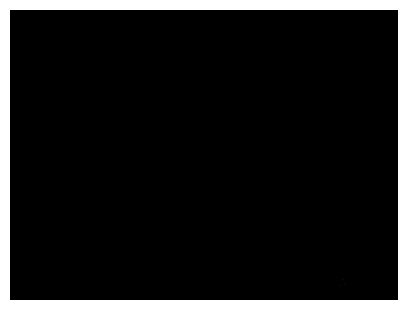

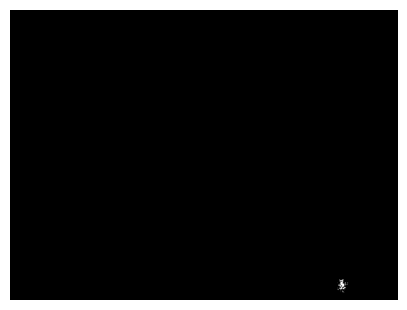

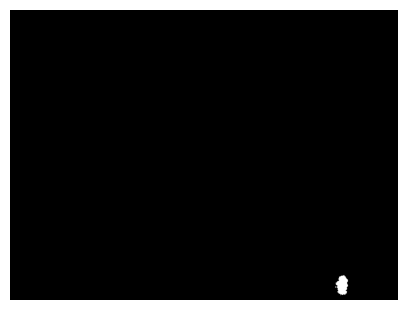

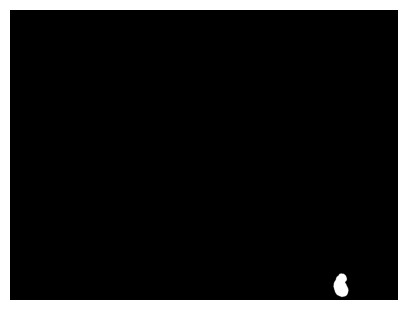

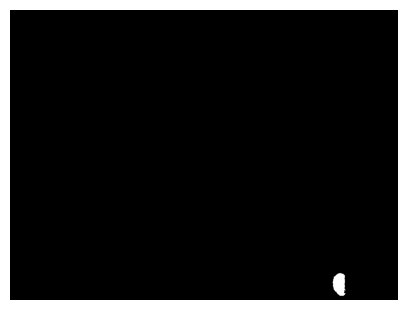

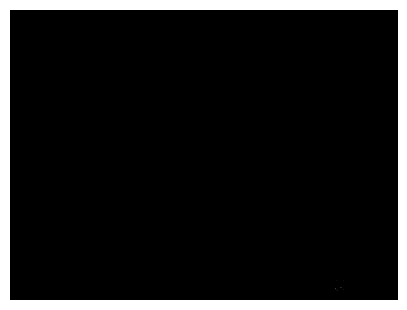

In [38]:
row = nucDF.loc[nucDF.index[12]]
templateshape = data['3D']['Image'].head(1)[11].shape
whitetemplate = np.zeros(templateshape)
posxyz = row['Nucleus Mask']
print(len(posxyz[0]))
whitetemplate[posxyz[0],posxyz[1],posxyz[2]] = 1
for slc in whitetemplate:
    fig,ax = plt.subplots(figsize=(5,5))
    ax.imshow(slc,cmap='gray')
    ax.axis('off')
    plt.show()

In [ ]:
# %matplotlib inline
# Filter dataset:
df = pd.concat([nucDF.loc[nucDF['Label'] == 'WT'],nucDF.loc[nucDF['Label'] == 'Dup41_46'],nucDF.loc[nucDF['Label'] == 'Del38_46'],nucDF.loc[nucDF['Label'] == 'Mut394']])
templateshape = data['3D']['Image'].head(1)[11].shape

global remove,flag,index
remove = []


output      = widgets.Output()

def button_eventhandler1(change):
    if change:
        remove += [index] 
        flag = True

    
def button_eventhandler(change):
    if change:
        flag = True



for index,row in df.iterrows():
    flag = False
#     
#     togwid = widgets.RadioButtons(options=['Yes','No'], description='Remove?',value='No')
    

    # Get image
    whitetemplate = np.zeros(templateshape)
    posxyz = row['Nucleus Mask']
    whitetemplate[posxyz[0],posxyz[1],posxyz[2]] = 1

#         plt.clf()
    # Plot image
    with output:
        checkw = widgets.Checkbox(value=False,description='Keep',disabled=False)
        checkdw = widgets.Checkbox(value=False,description='Dont Keep',disabled=False)

        for slc in whitetemplate:
            fig,ax = plt.subplots(figsize=(5,5))
            ax.imshow(slc,cmap='gray')
            ax.axis('off')
            plt.show()
        display(checkw)
        display(checkdw)

        
    
#     while flag == False:
    checkw.observe(button_eventhandler)
    checkdw.observe(button_eventhandler1)
#     if checkw.value == True:
#         remove += [index] 
       

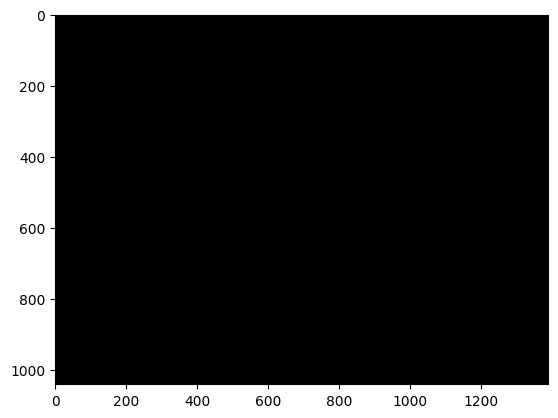

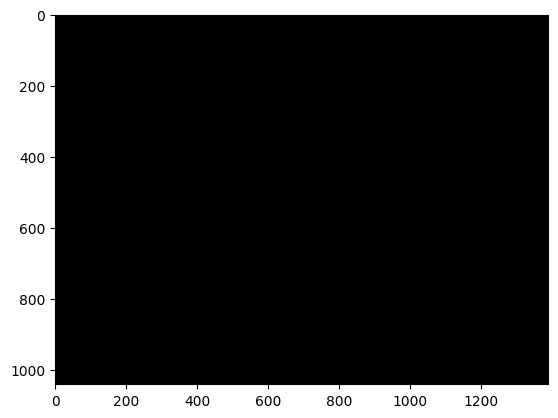

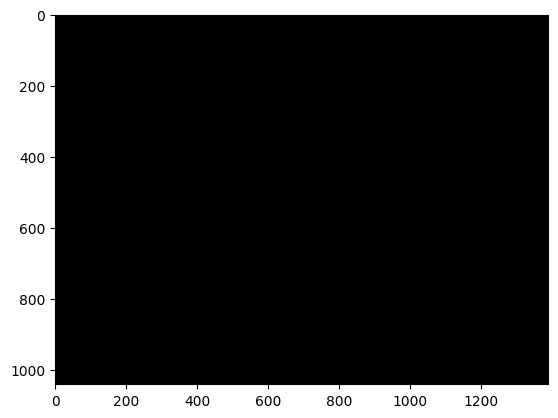

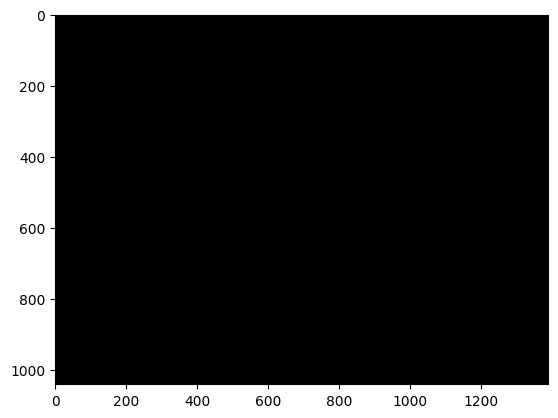

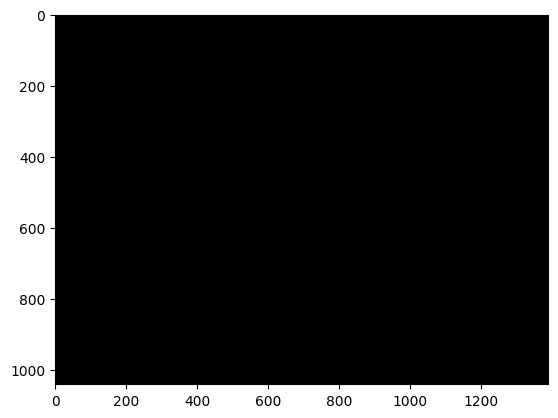

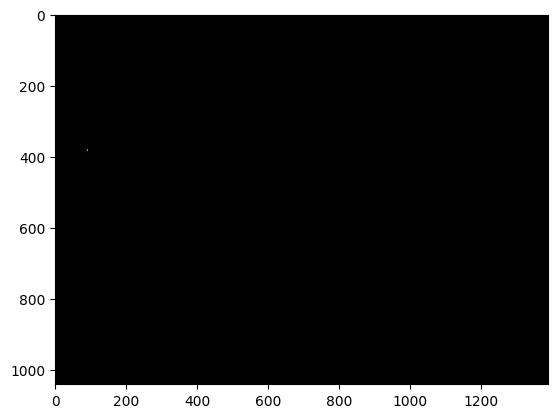

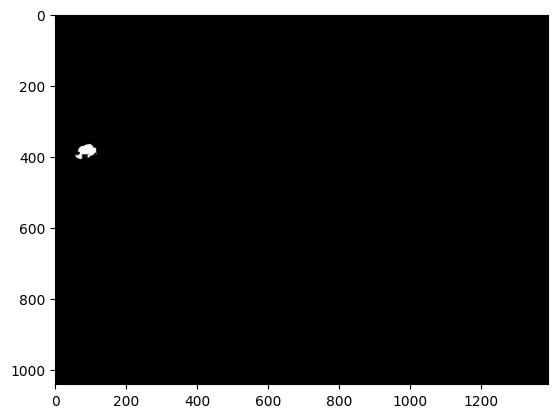

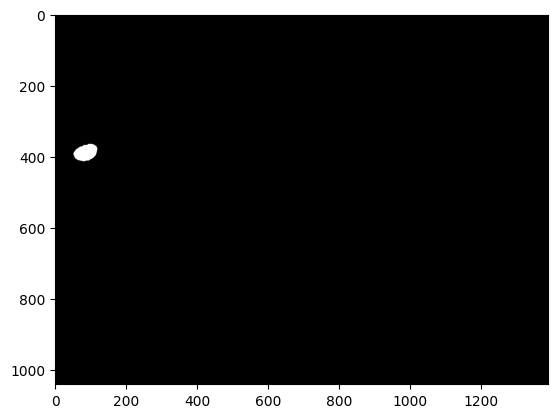

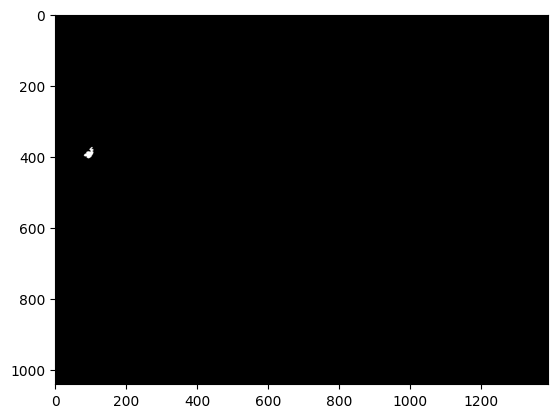

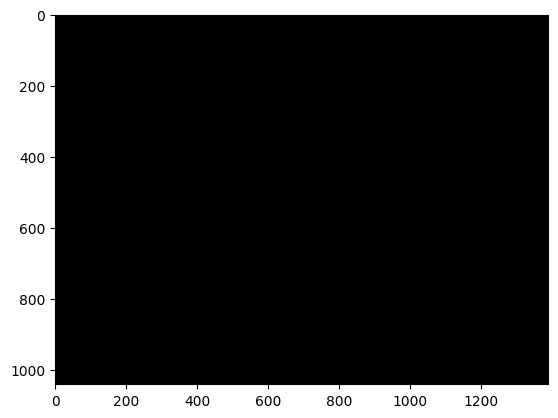

In [26]:
whitetemplate[a[0],a[1],a[2]] = 1
for slc in whitetemplate:
    plt.figure()
    plt.imshow(slc,cmap='gray')
    

# observe image nuclei with matplotlib

In [37]:
import napari
from skimage.measure import marching_cubes
# Obtain mask
img_id = 11
df = nucDF[nucDF['Img Index'] == img_id]
templateshape = data['3D']['Image'].head(1)[img_id].shape

ind = 1
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
whitetemplate = np.zeros(templateshape)
for index,row in df.iterrows():
    posxyz = row['Nucleus Mask']
    
    whitetemplate[posxyz[0],posxyz[1],posxyz[2]] = ind
    ind += 1
    
verts, faces, normals, values = marching_cubes(whitetemplate)
mesh = Poly3DCollection(verts[faces])
#mesh.set_edgecolor(list(np.random.choice(range(256), size=3)))
ax.add_collection3d(mesh)
ax.set_xlabel("z-axis")
ax.set_ylabel("x-axis")
ax.set_zlabel("y-axis")


ax.set_xlim(0, 10)  
ax.set_ylim(0, 1040)  
ax.set_zlim(0, 1388) 



plt.tight_layout()
ax.view_init(azim=180,elev=70,roll=-180)
plt.show()

# observe single nucleus with matplotlib

In [36]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage.measure import marching_cubes
%matplotlib qt
# Select nucleus
idn = 827
row = nucDF.loc[idn]
templateshape = data['3D']['Image'].head(1)[11].shape

# Obtain mask
whitetemplate = np.zeros(templateshape)
posxyz = row['Nucleus Mask']
whitetemplate[posxyz[0],posxyz[1],posxyz[2]] = 1

# xp,yp,zp = np.where(whitetemplate>0)
nucleuscut = whitetemplate[min(posxyz[0]):max(posxyz[0]),min(posxyz[1]):max(posxyz[1]),min(posxyz[2]):max(posxyz[2])]

# Open figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Get mesh
rot = whitetemplate.transpose(1, 2, 0)
verts, faces, normals, values = marching_cubes(rot)
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
#mesh.set_facecolor(tuple(list(np.random.choice(range(256), size=3)) + [0]))
ax.add_collection3d(mesh)
# ax.set_xlabel("z-axis")
# ax.set_ylabel("x-axis")
# ax.set_zlabel("y-axis")
 

ax.set_zlim(-1, 11)  
ax.set_xlim(min(posxyz[1]), max(posxyz[1]))  
ax.set_ylim(min(posxyz[2]), max(posxyz[2])) 

# ax.set_xticks(ax.get_xticks() * getvoxelsize(row['Name'])[0])
# ax.set_yticks(ax.get_yticks() * getvoxelsize(row['Name'])[1])
# ax.set_zticks(ax.get_zticks() * getvoxelsize(row['Name'])[2])
# ax.set_xlim(ax.get_xticks()[0], ax.get_xticks()[-1])  
# ax.set_ylim(ax.get_yticks()[0], ax.get_yticks()[-1])  
# ax.set_zlim(ax.get_zticks()[0], ax.get_zticks()[-1]) 

#ax.set_box_aspect(getvoxelsize(row['Name']))
plt.tight_layout()
ax.view_init(azim=180,elev=70,roll=180)


--------------

In [13]:
import ipywidgets as widgets

# Define the groups of features
groups = {
    'DCF': [
        'DCF:Area',
        'DCF:BB Area',
        'DCF:Perimeter',
        'DCF:Area convex',
        'DCF:Centroid',
        'DCF:Weighted Centroid',
        'DCF:Centroid Divergence',
        'DCF:Equivalent Diameter',
        'DCF:Extent',
        'DCF:Major Axis Length',
        'DCF:Minor Axis Length',
        'DCF:Height',
        'DCF:Euler Number',
        'DCF:Eccentricity',
        'DCF:Circularity',
        'DCF:Roundness',
        'DCF:Orientation',
        'DCF:Solidity',
        'DCF:Roughness',
        'DCF:Hu Moment #1',
        'DCF:Hu Moment #2',
        'DCF:Hu Moment #3',
        'DCF:Weighted Hu Moment #1',
        'DCF:Weighted Hu Moment #1',
        'DCF:Weighted Hu Moment #1',
        'DCF:Feret Diameter Max',
        'DCF:Crofton Perimeter',

        'DCF:Mean Intensity',
        'DCF:Std',
        'DCF:Variance',
        'DCF:Skewness',
        'DCF:Kurtosis',
        'DCF:Contrast',
        'DCF:Max Intensity',
        'DCF:Min Intensity',
        'DCF:Entropy',
        'DCF:Inertia Tensor Highest Eigenvalue',
        'DCF:Inertia Tensor Lowest Eigenvalue',

        'DCF:Uniformity',
        'DCF:Invariant Uniformity',
        'DCF:GLCM Entropy',
        'DCF:GLCM Invariant Entropy',
        'DCF:Correlation',
        'DCF:Invariant Correlation',
        'DCF:Dissimilarity',
        'DCF:Invariant Dissimilarity',
        'DCF:Contrast',
        'DCF:Invariant Contrast',
        'DCF:Homogeneity',
        'DCF:Invariant Homogeneity',
        'DCF:Energy',
        'DCF:Invariant Energy',

        'DCF:Mean Gabor Power',
        'DCF:Gabor Variance',
        'DCF:Gabor Mean',
        'DCF:Gabor Energy',
        'DCF:Gabor Entropy',
        'DCF:Mean Spectral Magnitude',
        'DCF:Mean Spectral Power'
    ],
    'DNF': [
            'DNF:Area',
            'DNF:BB Area',
            'DNF:Perimeter',
            'DNF:Area convex',
            'DNF:Centroid',
            'DNF:Weighted Centroid',
            'DNF:Centroid Divergence',
            'DNF:Equivalent Diameter',
            'DNF:Extent',
            'DNF:Major Axis Length',
            'DNF:Minor Axis Length',
            'DNF:Height',
            'DNF:Euler Number',
            'DNF:Eccentricity',
            'DNF:Circularity',
            'DNF:Roundness',
            'DNF:Orientation',
            'DNF:Solidity',
            'DNF:Roughness',
            'DNF:Hu Moment #1',
            'DNF:Hu Moment #2',
            'DNF:Hu Moment #3',
            'DNF:Weighted Hu Moment #1',
            'DNF:Weighted Hu Moment #1',
            'DNF:Weighted Hu Moment #1',
            'DNF:Feret Diameter Max',
            'DNF:Crofton Perimeter',
            
            'DNF:Mean Intensity',
            'DNF:Std',
            'DNF:Variance',
            'DNF:Skewness',
            'DNF:Kurtosis',
            'DNF:Contrast',
            'DNF:Max Intensity',
            'DNF:Min Intensity',
            'DNF:Entropy',
            'DNF:Inertia Tensor Highest Eigenvalue',
            'DNF:Inertia Tensor Lowest Eigenvalue',
            
            'DNF:Uniformity',
            'DNF:Invariant Uniformity',
            'DNF:GLCM Entropy',
            'DNF:GLCM Invariant Entropy',
            'DNF:Correlation',
            'DNF:Invariant Correlation',
            'DNF:Dissimilarity',
            'DNF:Invariant Dissimilarity',
            'DNF:Contrast',
            'DNF:Invariant Contrast',
            'DNF:Homogeneity',
            'DNF:Invariant Homogeneity',
            'DNF:Energy',
            'DNF:Invariant Energy',
            
            'DNF:Mean Gabor Power',
            'DNF:Gabor Variance',
            'DNF:Gabor Mean',
            'DNF:Gabor Energy',
            'DNF:Gabor Entropy',
            'DNF:Mean Spectral Magnitude',
            'DNF:Mean Spectral Power'
    ],
    'LSF': [
            'LSF2D:Angles',
            'LSF2D:Distances to Centroid',
            'LSF2D:Triangle Areas',
            'LSF2D:Line Lengths',
            'LSF2D:Theta',
            'LSF2D:Angle Difference',
            'LSF2D:Std. Angle Difference',
            'LSF2D:Local Line Distance',
            'LSF2D:Std. Local Line Distance',
            'LSF2D:PAD',
           
            'LSF1D:Number of Lines',
            'LSF1D:Radial Score',
            'LSF1D:Complete Diameter Distance',
            'LSF1D:Average Diameter Distance',
            'LSF1D:TAD',
            'LSF1D:OOP',
            'LSF1D:HI',
            'LSF1D:MCM'
    ],
    'CNF': [
            'CNF1D:Number of Branches',

            'CNF2D:branch-distance',
            'CNF1D:branch-distance mean',
            'CNF1D:branch-distance median',
            'CNF1D:branch-distance min',
            'CNF1D:branch-distance max',
            'CNF1D:branch-distance max_amp',
            'CNF1D:branch-distance var',
            'CNF1D:branch-distance std_dev',
            'CNF1D:branch-distance abs_dev',
            'CNF1D:branch-distance kurtosis',
            'CNF1D:branch-distance skewness',
            
            'CNF2D:mean-pixel-value',
            'CNF1D:mean-pixel-value mean',
            'CNF1D:mean-pixel-value median',
            'CNF1D:mean-pixel-value min',
            'CNF1D:mean-pixel-value max',
            'CNF1D:mean-pixel-value max_amp',
            'CNF1D:mean-pixel-value var',
            'CNF1D:mean-pixel-value std_dev',
            'CNF1D:mean-pixel-value abs_dev',
            'CNF1D:mean-pixel-value kurtosis',
            'CNF1D:mean-pixel-value skewness',
            
            'CNF2D:stdev-pixel-value',
            'CNF1D:stdev-pixel-value mean',
            'CNF1D:stdev-pixel-value median',
            'CNF1D:stdev-pixel-value min',
            'CNF1D:stdev-pixel-value max',
            'CNF1D:stdev-pixel-value max_amp',
            'CNF1D:stdev-pixel-value var',
            'CNF1D:stdev-pixel-value std_dev',
            'CNF1D:stdev-pixel-value abs_dev',
            'CNF1D:stdev-pixel-value kurtosis',
            'CNF1D:stdev-pixel-value skewness',
            
            'CNF2D:euclidean-distance',
            'CNF1D:euclidean-distance mean',
            'CNF1D:euclidean-distance median',
            'CNF1D:euclidean-distance min',
            'CNF1D:euclidean-distance max',
            'CNF1D:euclidean-distance max_amp',
            'CNF1D:euclidean-distance var',
            'CNF1D:euclidean-distance std_dev',
            'CNF1D:euclidean-distance abs_dev',
            'CNF1D:euclidean-distance kurtosis',
            'CNF1D:euclidean-distance skewness',
            
            'CNF1D:Number of Endpoint-to-endpoint (isolated branch)',
            'CNF1D:Ratio of Endpoint-to-endpoint (isolated branch)',
            'CNF1D:Mean of Endpoint-to-endpoint (isolated branch) branch-distance',
            'CNF1D:Std of Endpoint-to-endpoint (isolated branch) branch-distance',
            'CNF1D:Mean of Endpoint-to-endpoint (isolated branch) mean-pixel-value',
            'CNF1D:Std of Endpoint-to-endpoint (isolated branch) mean-pixel-value',
            'CNF1D:Mean of Endpoint-to-endpoint (isolated branch) stdev-pixel-value',
            'CNF1D:Std of Endpoint-to-endpoint (isolated branch) stdev-pixel-value',
            'CNF1D:Mean of Endpoint-to-endpoint (isolated branch) euclidean-distance',
            'CNF1D:Std of Endpoint-to-endpoint (isolated branch) euclidean-distance',
            
            'CNF1D:Number of Junction-to-endpoints',
            'CNF1D:Ratio of Junction-to-endpoints',
            'CNF1D:Mean of Junction-to-endpoints branch-distance',
            'CNF1D:Std of Junction-to-endpoints branch-distance',
            'CNF1D:Mean of Junction-to-endpoints mean-pixel-value',
            'CNF1D:Std of Junction-to-endpoints mean-pixel-value',
            'CNF1D:Mean of Junction-to-endpoints stdev-pixel-value',
            'CNF1D:Std of Junction-to-endpoints stdev-pixel-value',
            'CNF1D:Mean of Junction-to-endpoints euclidean-distance',
            'CNF1D:Std of Junction-to-endpoints euclidean-distance',
            
            'CNF1D:Number of Junction-to-junctions',
            'CNF1D:Ratio of Junction-to-junctions',
            'CNF1D:Mean of Junction-to-junctions branch-distance',
            'CNF1D:Std of Junction-to-junctions branch-distance',
            'CNF1D:Mean of Junction-to-junctions mean-pixel-value',
            'CNF1D:Std of Junction-to-junctions mean-pixel-value',
            'CNF1D:Mean of Junction-to-junctions stdev-pixel-value',
            'CNF1D:Std of Junction-to-junctions stdev-pixel-value',
            'CNF1D:Mean of Junction-to-junctions euclidean-distance',
            'CNF1D:Std of Junction-to-junctions euclidean-distance',
            
            'CNF1D:Number of Isolated cycles',
            'CNF1D:Ratio of Isolated cycles',
            'CNF1D:Mean of Isolated cycles branch-distance',
            'CNF1D:Std of Isolated cycles branch-distance',
            'CNF1D:Mean of Isolated cycles mean-pixel-value',
            'CNF1D:Std of Isolated cycles mean-pixel-value',
            'CNF1D:Mean of Isolated cycles stdev-pixel-value',
            'CNF1D:Std of Isolated cycles stdev-pixel-value',
            'CNF1D:Mean of Isolated cycles euclidean-distance',
            'CNF1D:Std of Isolated cycles euclidean-distance',
            
            'CNF1D:Sholl Crossings Cyto mean',
            'CNF1D:Sholl Crossings Cyto median',
            'CNF1D:Sholl Crossings Cyto min',
            'CNF1D:Sholl Crossings Cyto max',
            'CNF1D:Sholl Crossings Cyto max_amp',
            'CNF1D:Sholl Crossings Cyto var',
            'CNF1D:Sholl Crossings Cyto std_dev',
            'CNF1D:Sholl Crossings Cyto abs_dev',
            'CNF1D:Sholl Crossings Cyto kurtosis',
            'CNF1D:Sholl Crossings Cyto skewness',
            
            'CNF1D:Sholl Crossings Nuclei mean',
            'CNF1D:Sholl Crossings Nuclei median',
            'CNF1D:Sholl Crossings Nuclei min',
            'CNF1D:Sholl Crossings Nuclei max',
            'CNF1D:Sholl Crossings Nuclei max_amp',
            'CNF1D:Sholl Crossings Nuclei var',
            'CNF1D:Sholl Crossings Nuclei std_dev',
            'CNF1D:Sholl Crossings Nuclei abs_dev',
            'CNF1D:Sholl Crossings Nuclei kurtosis',
            'CNF1D:Sholl Crossings Nuclei skewness'
    ]
}

# Create the checkboxes
checkboxes = {}
for group, features in groups.items():
    checkbox_group = []
    for feature in features:
        checkbox = widgets.Checkbox(value=True, description=feature)
        checkbox_group.append(checkbox)
    checkboxes[group] = checkbox_group

# Create the button
generate_button = widgets.Button(description='Generate List')
features = []

# Function to handle button click event
def generate_list(button):
    global features
    features = []
    for group in checkboxes.values():
        features.extend([checkbox.description for checkbox in group if checkbox.value])
    #print(f'Features: {features}')

# Attach the function to the button click event
generate_button.on_click(generate_list)

# Create the checkbox groups and add vertical spacing
groups_layout = []
for group, checkboxes_group in checkboxes.items():
    checkboxes_group_layout = widgets.HBox(checkboxes_group)
    groups_layout.append(widgets.VBox([checkboxes_group_layout, widgets.HTML('<br>')]))

# Create the final layout
layout = widgets.VBox(groups_layout + [generate_button])

# Display the layout
layout


In [9]:
ResultsDF[list(filter(lambda x: x.startswith("DCF"),list(ResultsDF.columns)))]

,DCF:Number of Pixels,DCF:Area,DCF:Area convex,DCF:Perimeter,DCF:Centroid,DCF:Centroid Divergence,DCF:Equivalent Diameter,DCF:Extent,DCF:Major Axis Length,DCF:Minor Axis Length,...,DCF:Mean Intensity,DCF:Std,DCF:Variance,DCF:Skewness,DCF:Kurtosis,DCF:Contrast,DCF:Max Intensity,DCF:Min Intensity,DCF:Entropy,DCF:CV
0,5758,1.110725,1.175926,4.60464,"[3.284, 12.504]",868.004449,1.18921,0.666435,1.391708,1.031027,...,0.238502,0.219478,0.048171,0.774121,-0.231518,0.062378,1.0,0.000338,0.080479,0.920235


In [13]:
list(filter(lambda x: x.startswith("LSF1D"),list(ResultsDF.columns)))

['LSF1D:Number of Lines',
 'LSF1D:Complete Diameter Distance',
 'LSF1D:Average Diameter Distance',
 'LSF1D:OOP',
 'LSF1D:HI',
 'LSF1D:MCM',
 'LSF1D:TAD']

In [13]:
[x[0] for x in list(ResultsDF['CNF:Features'].values)[0]]

['SKNW:Number of Branches',
 'SKNW:branch-distance mean',
 'SKNW:branch-distance median',
 'SKNW:branch-distance min',
 'SKNW:branch-distance max',
 'SKNW:branch-distance max_amp',
 'SKNW:branch-distance var',
 'SKNW:branch-distance std_dev',
 'SKNW:branch-distance abs_dev',
 'SKNW:branch-distance kurtosis',
 'SKNW:branch-distance skewness',
 'SKNW:mean-pixel-value mean',
 'SKNW:mean-pixel-value median',
 'SKNW:mean-pixel-value min',
 'SKNW:mean-pixel-value max',
 'SKNW:mean-pixel-value max_amp',
 'SKNW:mean-pixel-value var',
 'SKNW:mean-pixel-value std_dev',
 'SKNW:mean-pixel-value abs_dev',
 'SKNW:mean-pixel-value kurtosis',
 'SKNW:mean-pixel-value skewness',
 'SKNW:stdev-pixel-value mean',
 'SKNW:stdev-pixel-value median',
 'SKNW:stdev-pixel-value min',
 'SKNW:stdev-pixel-value max',
 'SKNW:stdev-pixel-value max_amp',
 'SKNW:stdev-pixel-value var',
 'SKNW:stdev-pixel-value std_dev',
 'SKNW:stdev-pixel-value abs_dev',
 'SKNW:stdev-pixel-value kurtosis',
 'SKNW:stdev-pixel-value skewn

In [ ]:
23, 48, 49

In [11]:
row = ROIs.loc[23]

ResultsDF1 = analyze_cell(row,data,'deconvoluted',0,[2,2.5,1],features)

Error: No centroids within ROI


TypeError: cannot unpack non-iterable NoneType object

---

In [9]:
data['NUCL_PRE']

,Img Index,Label,Nucleus Mask,Centroid,Contour,Original Folder
0,11,WT,"[[36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, ...","(77.35, 223.719)","([[[226 36]], [[225 37]], [[224 37]], [[223...",C:\Users\diogo\OneDrive - Universidade de Lisb...
1,11,WT,"[[37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, ...","(99.356, 902.922)","([[[872 37]], [[871 38]], [[870 38]], [[869...",C:\Users\diogo\OneDrive - Universidade de Lisb...
2,11,WT,"[[52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, ...","(79.314, 99.782)","([[[102 52]], [[101 53]], [[100 53]], [[99 ...",C:\Users\diogo\OneDrive - Universidade de Lisb...
3,11,WT,"[[81, 81, 82, 82, 83, 83, 83, 83, 83, 83, 83, ...","(129.957, 683.473)","([[[647 81]], [[648 82]], [[648 83]], [[648...",C:\Users\diogo\OneDrive - Universidade de Lisb...
4,11,WT,"[[100, 100, 100, 100, 100, 100, 100, 100, 100,...","(158.034, 1175.184)","([[[1172 100]], [[1171 101]], [[1170 101]],...",C:\Users\diogo\OneDrive - Universidade de Lisb...
...,...,...,...,...,...,...
1368,9,WT,"[[809, 809, 809, 809, 809, 809, 810, 810, 810,...","(861.724, 1205.697)","([[[1197 809]], [[1196 810]], [[1195 810]],...",C:\Users\diogo\OneDrive - Universidade de Lisb...
1369,9,WT,"[[831, 831, 831, 831, 831, 831, 831, 831, 831,...","(861.138, 1024.504)","([[[1012 831]], [[1011 832]], [[1010 833]],...",C:\Users\diogo\OneDrive - Universidade de Lisb...
1370,9,WT,"[[850, 850, 850, 850, 850, 850, 850, 850, 850,...","(908.88, 177.036)","([[[175 850]], [[174 851]], [[174 852]], [[174...",C:\Users\diogo\OneDrive - Universidade de Lisb...
1371,9,WT,"[[896, 896, 896, 896, 896, 896, 896, 896, 896,...","(945.01, 845.786)","([[[845 896]], [[844 897]], [[843 897]], [[842...",C:\Users\diogo\OneDrive - Universidade de Lisb...


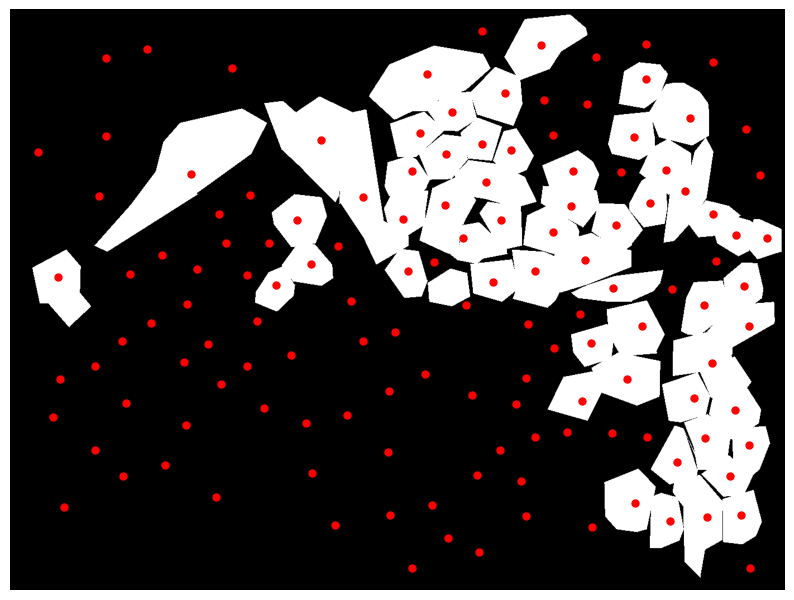

In [7]:
def plot_ROIs_and_centroids(img_id,data,ROIsDF):
    
    df = ROIs[ROIs['Index']==img_id]
    df_NUCL_PRE = data['NUCL_PRE'][data['NUCL_PRE']['Img Index']==img_id]

    i = 0
    for index,row in df.iterrows():
        if i == 0:
            auxx = row['ROImask']
            i = 1
        else:
            auxx = auxx + row['ROImask']
            
    fig,ax = plt.subplots(figsize=(10,10))
    plt.imshow(auxx,cmap='gray')
    plt.axis('off')
    
    for index,row in df_NUCL_PRE.iterrows():
        plt.plot(row['Centroid'][1],row['Centroid'][0],'o',color='red',markersize=5)
    
    
#     plt.tight_layout()

#     # PLOT MASK WITH NUCLEI ID
#     plt.subplot(1,3,2)
#     #path     = dir_masks + '/nuclei_' + row['Name']
#     path     = dir_masks + "\\" + row['Name'] + "f"
#     nuc_mask = cv2.imread(path,-1)
#     plt.imshow(nuc_mask,cmap="gray")
#     plt.axis('off')
#     plt.tight_layout()

#     # PLOT MASK WITH CENTROIDS
#     plt.subplot(1,3,3)
#     plt.imshow(nuc_mask,cmap="gray")
#     plt.axis('off')
    
#     plt.tight_layout()

plot_ROIs_and_centroids(42,data,ROIs)

In [5]:
print('>>> 🔎')
ResultsDF = df_analyze_cell(data     = data,
                            ROIsDF   = ROIs,
                            specs    = {'algorithm_cyto': 'deconvoluted',
                                       'algorithm_nucl': 0,
                                       'LSFparams':      [2,2.5,1]},
                            features = features)

>>> 🔎
>>> Progress: 0.0% 0
>>> Progress: 0.095% 1
>>> Progress: 0.19% 2
>>> Progress: 0.285% 3
>>> Progress: 0.381% 4
>>> Progress: 0.476% 5
>>> Progress: 0.571% 6
>>> Progress: 0.666% 7
>>> Progress: 0.761% 8
>>> Progress: 0.856% 9
>>> Progress: 0.951% 10
>>> Progress: 1.047% 11
>>> Progress: 1.142% 12
>>> Progress: 1.237% 13
>>> Progress: 1.332% 14
>>> Progress: 1.427% 15
>>> Progress: 1.522% 16
>>> Progress: 1.618% 17
>>> Progress: 1.713% 18
>>> Progress: 1.808% 19
>>> Progress: 1.903% 20


C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\ImageFeatures.py:628: RuntimeWarning: invalid value encountered in double_scalars
  mean_pxx   = np.sum(sum_fp)/sum_int


>>> Progress: 1.998% 21
>>> Progress: 2.093% 22
Error: No centroids within ROI
ERRO em 23
>>> Progress: 2.188% 23
>>> Progress: 2.284% 24
>>> Progress: 2.379% 25
>>> Progress: 2.474% 26
>>> Progress: 2.569% 27
>>> Progress: 2.664% 28
>>> Progress: 2.759% 29
>>> Progress: 2.854% 30


C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\ImageFeatures.py:628: RuntimeWarning: invalid value encountered in double_scalars
  mean_pxx   = np.sum(sum_fp)/sum_int


>>> Progress: 2.95% 31
>>> Progress: 3.045% 32
>>> Progress: 3.14% 33
>>> Progress: 3.235% 34
>>> Progress: 3.33% 35
>>> Progress: 3.425% 36
>>> Progress: 3.52% 37
>>> Progress: 3.616% 38
>>> Progress: 3.711% 39
>>> Progress: 3.806% 40
>>> Progress: 3.901% 41
>>> Progress: 3.996% 42
>>> Progress: 4.091% 43
>>> Progress: 4.186% 44
>>> Progress: 4.282% 45
>>> Progress: 4.377% 46
>>> Progress: 4.472% 47
>>> Progress: 4.567% 48
>>> Progress: 4.662% 49
Error: No centroids within ROI
ERRO em 50
>>> Progress: 4.757% 50
>>> Progress: 4.853% 51
>>> Progress: 4.948% 52
>>> Progress: 5.043% 53
>>> Progress: 5.138% 54
>>> Progress: 5.233% 55
>>> Progress: 5.328% 56
>>> Progress: 5.423% 57
>>> Progress: 5.519% 58
>>> Progress: 5.614% 59
>>> Progress: 5.709% 60
>>> Progress: 5.804% 61
>>> Progress: 5.899% 62
>>> Progress: 5.994% 63
Error: No centroids within ROI
ERRO em 64
>>> Progress: 6.089% 64
>>> Progress: 6.185% 65
>>> Progress: 6.28% 66
>>> Progress: 6.375% 67
>>> Progress: 6.47% 68
>>> Progre

C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\ImageFeatures.py:628: RuntimeWarning: invalid value encountered in double_scalars
  mean_pxx   = np.sum(sum_fp)/sum_int


>>> Progress: 26.832% 282
>>> Progress: 26.927% 283
>>> Progress: 27.022% 284
>>> Progress: 27.117% 285
>>> Progress: 27.212% 286
>>> Progress: 27.307% 287
>>> Progress: 27.402% 288
>>> Progress: 27.498% 289
>>> Progress: 27.593% 290
>>> Progress: 27.688% 291
>>> Progress: 27.783% 292
>>> Progress: 27.878% 293
>>> Progress: 27.973% 294
>>> Progress: 28.069% 295
>>> Progress: 28.164% 296
>>> Progress: 28.259% 297
>>> Progress: 28.354% 298
>>> Progress: 28.449% 299
>>> Progress: 28.544% 300
>>> Progress: 28.639% 301
>>> Progress: 28.735% 302
>>> Progress: 28.83% 303
>>> Progress: 28.925% 304
>>> Progress: 29.02% 305
>>> Progress: 29.115% 306
>>> Progress: 29.21% 307
>>> Progress: 29.305% 308
>>> Progress: 29.401% 309
>>> Progress: 29.496% 310
>>> Progress: 29.591% 311
>>> Progress: 29.686% 312
>>> Progress: 29.781% 313
>>> Progress: 29.876% 314
>>> Progress: 29.971% 315
>>> Progress: 30.067% 316
>>> Progress: 30.162% 317
>>> Progress: 30.257% 318
>>> Progress: 30.352% 319
>>> Progress: 3

C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\ImageFeatures.py:628: RuntimeWarning: invalid value encountered in double_scalars
  mean_pxx   = np.sum(sum_fp)/sum_int


>>> Progress: 41.199% 433
>>> Progress: 41.294% 434
Error: No centroids within ROI
ERRO em 435
>>> Progress: 41.389% 435
>>> Progress: 41.484% 436
>>> Progress: 41.579% 437
>>> Progress: 41.675% 438
>>> Progress: 41.77% 439
>>> Progress: 41.865% 440
>>> Progress: 41.96% 441
>>> Progress: 42.055% 442
>>> Progress: 42.15% 443
>>> Progress: 42.245% 444
>>> Progress: 42.341% 445
Error: No centroids within ROI
ERRO em 446
>>> Progress: 42.436% 446
>>> Progress: 42.531% 447
Error: No centroids within ROI
ERRO em 448
>>> Progress: 42.626% 448
>>> Progress: 42.721% 449
>>> Progress: 42.816% 450
>>> Progress: 42.912% 451
Error: No centroids within ROI
ERRO em 452
>>> Progress: 43.007% 452
>>> Progress: 43.102% 453
>>> Progress: 43.197% 454
>>> Progress: 43.292% 455
>>> Progress: 43.387% 456
>>> Progress: 43.482% 457
>>> Progress: 43.578% 458
>>> Progress: 43.673% 459
>>> Progress: 43.768% 460
>>> Progress: 43.863% 461
>>> Progress: 43.958% 462
>>> Progress: 44.053% 463
>>> Progress: 44.148% 464

C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\ImageFeatures.py:628: RuntimeWarning: invalid value encountered in double_scalars
  mean_pxx   = np.sum(sum_fp)/sum_int


>>> Progress: 45.005% 473
>>> Progress: 45.1% 474
>>> Progress: 45.195% 475
>>> Progress: 45.29% 476
>>> Progress: 45.385% 477
>>> Progress: 45.48% 478
>>> Progress: 45.576% 479
>>> Progress: 45.671% 480
>>> Progress: 45.766% 481
>>> Progress: 45.861% 482
>>> Progress: 45.956% 483
>>> Progress: 46.051% 484
>>> Progress: 46.147% 485
>>> Progress: 46.242% 486
>>> Progress: 46.337% 487
>>> Progress: 46.432% 488
>>> Progress: 46.527% 489
>>> Progress: 46.622% 490
>>> Progress: 46.717% 491
>>> Progress: 46.813% 492
>>> Progress: 46.908% 493
>>> Progress: 47.003% 494
>>> Progress: 47.098% 495
>>> Progress: 47.193% 496
>>> Progress: 47.288% 497
>>> Progress: 47.383% 498
>>> Progress: 47.479% 499
>>> Progress: 47.574% 500
>>> Progress: 47.669% 501
>>> Progress: 47.764% 502
>>> Progress: 47.859% 503
>>> Progress: 47.954% 504
>>> Progress: 48.049% 505
>>> Progress: 48.145% 506
>>> Progress: 48.24% 507
>>> Progress: 48.335% 508
>>> Progress: 48.43% 509
>>> Progress: 48.525% 510
>>> Progress: 48.6

C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\ImageFeatures.py:628: RuntimeWarning: invalid value encountered in double_scalars
  mean_pxx   = np.sum(sum_fp)/sum_int


>>> Progress: 66.223% 696
>>> Progress: 66.318% 697
>>> Progress: 66.413% 698
>>> Progress: 66.508% 699
>>> Progress: 66.603% 700
>>> Progress: 66.698% 701
Error: No centroids within ROI
ERRO em 702
>>> Progress: 66.794% 702
Error: No centroids within ROI
ERRO em 703
>>> Progress: 66.889% 703
>>> Progress: 66.984% 704
>>> Progress: 67.079% 705
>>> Progress: 67.174% 706
>>> Progress: 67.269% 707
>>> Progress: 67.364% 708
>>> Progress: 67.46% 709
>>> Progress: 67.555% 710
>>> Progress: 67.65% 711
>>> Progress: 67.745% 712
>>> Progress: 67.84% 713
>>> Progress: 67.935% 714
>>> Progress: 68.03% 715
Error: No centroids within ROI
ERRO em 716
>>> Progress: 68.126% 716
>>> Progress: 68.221% 717
>>> Progress: 68.316% 718
>>> Progress: 68.411% 719
>>> Progress: 68.506% 720
>>> Progress: 68.601% 721
>>> Progress: 68.696% 722
>>> Progress: 68.792% 723
>>> Progress: 68.887% 724
>>> Progress: 68.982% 725
>>> Progress: 69.077% 726
>>> Progress: 69.172% 727
Error: No centroids within ROI
ERRO em 728


C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\ImageFeatures.py:628: RuntimeWarning: invalid value encountered in double_scalars
  mean_pxx   = np.sum(sum_fp)/sum_int


>>> Progress: 69.648% 732
>>> Progress: 69.743% 733
>>> Progress: 69.838% 734
>>> Progress: 69.933% 735
>>> Progress: 70.029% 736
Error: No centroids within ROI
ERRO em 737
>>> Progress: 70.124% 737
>>> Progress: 70.219% 738
Error: No centroids within ROI
ERRO em 739
>>> Progress: 70.314% 739
>>> Progress: 70.409% 740
Error: No centroids within ROI
ERRO em 741
>>> Progress: 70.504% 741
>>> Progress: 70.599% 742
>>> Progress: 70.695% 743
>>> Progress: 70.79% 744
>>> Progress: 70.885% 745
>>> Progress: 70.98% 746
>>> Progress: 71.075% 747


C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\ImageFeatures.py:628: RuntimeWarning: invalid value encountered in double_scalars
  mean_pxx   = np.sum(sum_fp)/sum_int


>>> Progress: 71.17% 748
>>> Progress: 71.265% 749
Error: No centroids within ROI
ERRO em 750
>>> Progress: 71.361% 750
>>> Progress: 71.456% 751
>>> Progress: 71.551% 752
>>> Progress: 71.646% 753
>>> Progress: 71.741% 754
>>> Progress: 71.836% 755
>>> Progress: 71.931% 756
>>> Progress: 72.027% 757
>>> Progress: 72.122% 758
>>> Progress: 72.217% 759
>>> Progress: 72.312% 760
>>> Progress: 72.407% 761
Error: No centroids within ROI
ERRO em 762
>>> Progress: 72.502% 762
>>> Progress: 72.598% 763
>>> Progress: 72.693% 764
>>> Progress: 72.788% 765
>>> Progress: 72.883% 766
>>> Progress: 72.978% 767
>>> Progress: 73.073% 768
>>> Progress: 73.168% 769
>>> Progress: 73.264% 770
>>> Progress: 73.359% 771
>>> Progress: 73.454% 772
>>> Progress: 73.549% 773
>>> Progress: 73.644% 774
>>> Progress: 73.739% 775
>>> Progress: 73.834% 776
>>> Progress: 73.93% 777
>>> Progress: 74.025% 778
>>> Progress: 74.12% 779
>>> Progress: 74.215% 780
>>> Progress: 74.31% 781
Error: No centroids within ROI
ERR

C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\ImageFeatures.py:628: RuntimeWarning: invalid value encountered in double_scalars
  mean_pxx   = np.sum(sum_fp)/sum_int


>>> Progress: 96.67% 1016
>>> Progress: 96.765% 1017
>>> Progress: 96.86% 1018
>>> Progress: 96.955% 1019
>>> Progress: 97.05% 1020
>>> Progress: 97.146% 1021
>>> Progress: 97.241% 1022
>>> Progress: 97.336% 1023
>>> Progress: 97.431% 1024


C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\CYSK_Workspace\CYSK\framework\ImageFeatures.py:628: RuntimeWarning: invalid value encountered in double_scalars
  mean_pxx   = np.sum(sum_fp)/sum_int


>>> Progress: 97.526% 1025
>>> Progress: 97.621% 1026
>>> Progress: 97.716% 1027
>>> Progress: 97.812% 1028
>>> Progress: 97.907% 1029
>>> Progress: 98.002% 1030
>>> Progress: 98.097% 1031
>>> Progress: 98.192% 1032
>>> Progress: 98.287% 1033
Error: No centroids within ROI
ERRO em 1034
>>> Progress: 98.382% 1034
>>> Progress: 98.478% 1035
>>> Progress: 98.573% 1036
>>> Progress: 98.668% 1037
>>> Progress: 98.763% 1038
>>> Progress: 98.858% 1039
>>> Progress: 98.953% 1040
>>> Progress: 99.049% 1041
>>> Progress: 99.144% 1042
>>> Progress: 99.239% 1043
>>> Progress: 99.334% 1044
>>> Progress: 99.429% 1045
>>> Progress: 99.524% 1046
>>> Progress: 99.619% 1047
>>> Progress: 99.715% 1048
>>> Progress: 99.81% 1049
>>> Progress: 99.905% 1050


In [9]:
ResultsDF.to_pickle(folder + "//ResultsDF_try.pkl") 
ResultsDF.to_excel(folder + "//ResultsDF_try.xlsx")